<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[13차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ 이미지의 중요한 특성에 대해 학습한다. <br><br>
○ 이미지의 특징점을 추출하는 방법에 대해 학습한다.</font></td></tr>   
</table>

# 이미지 특성의 이해

<img src="./lecture_image/13_opencv047.png" width="50%">

<img src="./lecture_image/13_opencv048.png" width=60%>

- A, B : 전체 이미지에서 어디인지 정확히 알 수 없음
- C, D : 건물 지붕인 건 알겠는데 정확한 위치는 알 수 없음
- E, F :  전체 이미지에서 어디인지 정확히 알 수 있음

<img src="./lecture_image/13_opencv049.png" width=50%>

- 적색 박스 : 약간만 움직여도 내부의 변화를 알 수 있음
- 청색 박스 : 움직여도 내부의 특성이 전혀 변하지 않음
- 녹색 박스 : 상하 이동의 경우만 내부의 변화를 알 수 있음

→ 이미지의 코너를 찾아서 이미지의 특성을 검출하는 방법이 유용

# 코너 (Corner) 검출

- 코너 : 이미지에서 뾰족하게 뛰어나온 부분
- 코너는 이미지에서 고유한 특징을 가지고 있어서 이미지를 잘 분류하도록 함


- 코너 검출 알고리즘
  - Harris 방법
  - Shi-Tomasi 방법
  - FAST (Features from Accelerated Segment Test)
  - SIFT (Scale Invariant Feature Transform)
  - SURF (Speeded Up Robust Features)
  - BRIEF (Binary Robust Independent Elementary Features)
  - BRISK (Binary Robust Invariant Scalable Keypoints)  
  - ORB (Oriented FAST and Rotated BRIEF) 
  - KAZE
  - AKAZE (Accelerated-KAZE)

## GFTT (Shi-Tomasi  방법)  

- Harris 방법을 개선한 것



- <font color=red>corners = cv2.goodFeaturesToTrack(이미지, 코너 검출 개수, 문턱값, 코너 간 최소 거리) </font>

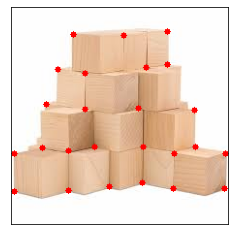

In [37]:
#실습

## FAST

- FAST (Features from Accelerated Segment Test)
  - 특정 픽셀(p) 주변 16개 픽셀 값들을 조사해서 그 픽셀값이 가운데 픽셀(p)보다 충분히 어둡거나 충분히 밝은 픽셀이 9개 이상 나타나면 코너라고 판단
  
  <img src="./lecture_image/13_fast.png" width=50%>
  
  
- <font color=red>fast = cv2.FastFeatureDetector_create(threshold)</font> 
  - threshold : 중심 픽셀 값과 주변 픽셀 값과의 차이 임계값. 기본값은 10. 30~60 적절
  
  
- <font color=red>keypoints = fast.detect(img)</font>    
  - 특징점을 검색하고 결과를 리스트로 받음

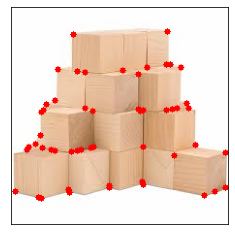

In [13]:
#실습

## SIFT 

- 참고 : https://ballentain.tistory.com/47, https://deep-learning-study.tistory.com/252


- Harris, GFTT, FAST 방법은 이동, 회전 변화에 강인하지만 크기 변환에 취약
  - 확대된 영상에서 작은 사각형으로 코너를 찾으려하면 기존의 코너가 에지처럼 보임
  - 따라서, 코너를 찾을 때 다양항 크기도 고려를 해서 코너 형태를 찾는 것이 고유한 특징을 찾는데에 적합

    <img src="./lecture_image/13_feature.png" width=50%>


- SIFT (Scale Invariant Feature Transform) : 이미지의 크기 및 회전에 영향을 받지 않고 특징점을 추출하는 알고리즘

- 코너만으로 특징화하기는 충분하지 않음
- 코너는 크기변환, 회전, 밝기 변화 등에 따라 변화될 수 있음

- 동작 방법
  - Scale-space extrema detection
    - 원본 이미지를 다양한 크기로 resize해서 image pyramid를 만듬
    
    <img src="./lecture_image/13_sift01.png" width=40%>
    
    - image pyramid의 각 층 이미지(octave image)를 점점 더 커지는 gaussian blurring를 적용한 이미지들을 얻음. 
    
    <img src="./lecture_image/13_sift02.png" width=40%>
    
    - octave 내 서로 다른 두 개 gaussian blurred image로 빼기 연산을 수행하여 Difference of Gaussian(DoG) 이미지를 구함
    
    <img src="./lecture_image/13_sift03.png" width=50%>  
    
   - 해당 좌표가 극소점이거나 극대점이라 판단되면 이를 keypoint 후보군으로 분류
   - DoG<sub>target</sub>에서 target pixel (빨간점) 값을 총 26개의 주변 pixel 값과 비교해 극점인지 판단
          
    <img src="./lecture_image/13_sift04.png" width=40%>  
    
 - Keypoint Localization
   - 뽑은 keypoint 후보군들 중에는 most stable keypoint만을 선택하는 과정 - 크기에 불변하는 성질  
   
  - Orientation assignment : keypoint의 방향을 결정하는 단계
   - keypoint 주변(16x16)으로 그레디언트 크기와 방향을 계산 - gaussian blurred image
   - keypoint에서 방향 히스토그램을 계산하여 가장 큰 값을 가진 곳을 방향으로 설정 - 회전에 불변하는 성질
    <img src="./lecture_image/13_sift05.png" width=40%>      
       
  - Keypoint descriptor  
   - 한 개의 16x16 patch에서는 8방향 정보가 16개 생성되어 총 128개의 값을 얻음 (keypoint descriptor)
   - 후처리로 descriptor에서 keypoint orientation 값을 빼 rotation-invariance 성질을 부여하고 nomalization을 통해 밝기 의존성을 해결
   
       <img src="./lecture_image/13_sift06.png" width=40%>  
       
       

- <font color=red>detector = cv2.SIFT_create()</font>
  - SIFT 객체 생성


- <font color=red>keypoints, descriptors = detector.detectAndCompute(gray_img, None)</font>   
  - 키포인트 위치와 기술자 계산

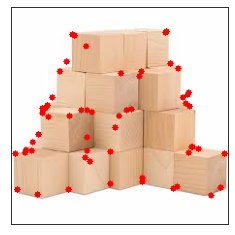

In [12]:
#실습

## SURF 

- SURF (Speeded Up Robust Features)는 크기 변화에 따른 특징 검출 문제를 해결하기 위해 이미지 피라미드를 사용하므로 속도가 느리다는 문제
- SURF는 이미지 피라미드 대신 필터의 크기를 변화시키는 방식으로 성능을 개선

## ORB 

- ORB (Oriented FAST and Rotated BRIEF) 알고리즘 : SIFT, SURF 대신에 자유롭게 사용할 수 있는 OpenCV의 이미지 특성 검출 알고리즘
- ORB가 위에 것보다 낫다는 평이 많음


- <font color=red>orb = cv2.ORB_create()</font>
  - ORB 객체 생성

(-0.5, 224.5, 224.5, -0.5)

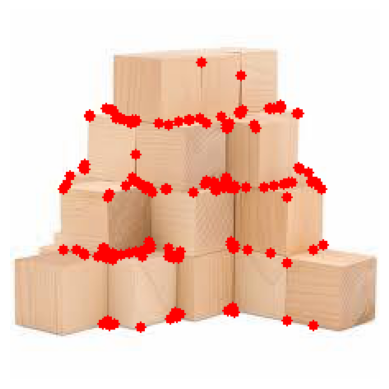

In [11]:
#실습
import cv2
import matplotlib.pyplot as plt
import math

img = cv2.imread("./image/corner2.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


orb = cv2.ORB_create()

# 특징점(코너점의 위치), 기술자(방향)가 반환
keypoints, descriptors = orb.detectAndCompute(img, None)


# 코너점 표시(사실, 특징점이라고 표현하는 것이 더 정확)
for i in keypoints :
    pt = (int(i.pt[0]), int(i.pt[1]))
    
    cv2.circle(img, pt, 3, (255, 0, 0), -1)
    
plt.imshow(img)
plt.axis("off")

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>
            
○ KAZE 알고리즘을 이용하여 특징점을 구해보자
  - <font color=red>cv2.KAZE_create()</font> : KAZE 알고리즘 초기화
</font></td></tr> 
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;">
        <img src="./lecture_image/13_feature2.png" width=30%>
        </td></tr>   
</table>

## ORB 기반의 이미지 특징점 매칭

- 참고 : https://deep-learning-study.tistory.com/260


- 특징점 매칭 : 서로 유사한 기술자를 찾는 작업
  - 아래 그림에서 왼쪽은 4개의 기술자, 오른쪽은 3개의 기술자를 계산
  - 가장 비슷한 것을 찾으므로 4개의 점은 다 매칭이 될 것
  - #3이 잘못 매칭된 것을 확인할 수 있는데 알고리즘은 가장 거리가 짧은 곳을 찾아서 매칭을 하기 때문에 매칭이 됨
  - 이처럼 잘못 연결된 매칭을 걸러내는 작업을 해야함

<img src="./lecture_image/13_matching.png" width=60%>  

- <font color=red>bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)</font>
  - cv2.NORM_HAMMING : 유사도 측정 방법으로 해밍거리를 이용 (이진 기술자인 경우에 사용)
    - cv2.NORM_L1 (기본값), cv2.NORM_L2, cv2.NORM_HAMMING2 
    - 해밍거리 표현 방법
    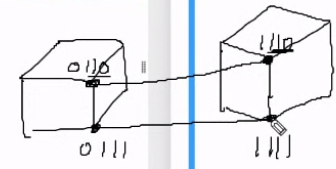
    
  - crossCheck : True이면 양방향 매칭 결과가 같은 경우만 반환 (기본값 False)
    
  
  - 가능한 모든 경우에 대해 다 계산해본 후 최적의 결과를 반환
  - image A의 기술자와 가장 유사도가 높은 image B의 기술자를 찾기 위해 M개의 기술자를 대상으로 거리를 모두 구함
  - 다음에 가장 짧은 거리를 갖는 image B의 기술자를 찾음
  - 만약 image A의 기술자 N과 image B의 기술자 M이 가장 유사도가 높은 기술자라고 가정하면, cv2.BFMatcher( )는 매칭된 기술자들의 index들과 유사도를 반환 

   <img src="./lecture_image/13_orb2.png" width=60%>  

- <font color=red>bf = cv2.cv2.FlannBasedMatcher()</font>
  - cv2.BFMatcher()는 전체 데이터를 대상으로 하므로 특징점이 많으면 시간이 오래 걸림
  - cv2.FlannBasedMatcher()는 특징점이 많으면 근사화하여 수행하므로 최소값 매칭을 못할 수도 있지만 속도가 빠름
  - 반환값은 4개의 값을 반환
    - queryIdx : 1번 이미지의 특징점 번호
    - trainIdx : 2번 이미지의 특징점 번호
    - imgidx : 두 영상이 아닌 여러 개의 영상을 이용할 때 이 값을 이용
    - distance : 매칭될 때의 최소 거리값이 저장
    

- <font color=red>matches = bf.match(des1, des2)</font>
  - 특징점 간 매칭 실행
  
  - (1) des1[0]과 매칭되는 des2의 기술자에 대한 정보를 matches[0]에 저장
  - (2) des1[1]와 매칭되는 des2의 기술자에 대한 정보를 matches[1]에 저장
  - (3) des1의 마지막 기술자까지 반복

       <img src="./lecture_image/13_orb1.png" width=70%>  
       

- <font color=red>res = cv2.drawMatches(img_gray, kp1, img2_gray, kp2, matches1to2, outImg, flags=2)</font>
  - 특징점 매칭 결과 이미지 생성
  - img_gray, kp1 : 첫번째 이미지와 키포인트
  - img2_gray, kp2 : 두번째 이미지와 키포인트
  - matches1to2 : 매칭 정보 (슬라이싱으로 출력할 쌍의 갯수 설정)
  - outImg : 결과 이미지 (None)
  - flags : 매칭정보 그리기 방법 - lags = 0 (매칭과 상관없이 모든 특성 포인트 표, flags=2 (매칭된 특성포인트만 표시)  

(-0.5, 1089.5, 588.5, -0.5)

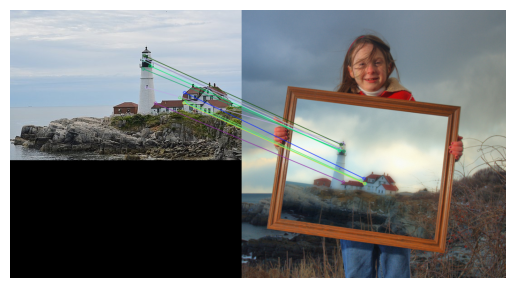

In [34]:
#실습
import cv2
import matplotlib.pyplot as plt
import math

img = cv2.imread("./image/pic.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread("./image/girl_pic.png", cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# 두 이미지에서 코너점 검출
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img_gray, None)
kp2, des2 = orb.detectAndCompute(img2_gray, None)

# 두 특징점 매칭
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# 해킹거리가 가장 일치한 순으로 정렬
matches = sorted(matches, key=lambda x : x.distance)

# 매장된 결과를 이미지로 그려준다.
#matches[:12] : 그려줄 매칭 결과 개수
res = cv2.drawMatches(img, kp1, img2, kp2, matches[:12], None, flags=2)


plt.imshow(res)
plt.axis("off")

- key=lambda의 의미

In [4]:
mylist = [3, 6, 3, 2, 4, 8, 23]

sort = sorted(mylist, key=lambda x: x%2==0)

print(sort)

[3, 3, 23, 6, 2, 4, 8]


- 동작순서 : [3, 6, 3, 2, 4, 8, 23] → [0, 1, 0, 1, 1, 1, 0] → [3, 3, 23, 6, 2, 4, 8]

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ KAZE 알고리즘을 이용하여 특징점 매칭을 수행하고 ORB와 비교해보자</font></td></tr> 
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;">
        <img src="./lecture_image/13_feature_matching.png" width=60%></td></tr>   
</table>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[13차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 코너 (corner) : 이미지에서 뾰족하게 뛰어나온 부분
   - 코너는 이미지에서 고유한 특징을 가지고 있어서 이미지를 잘 분류하도록 함

○ 코너 검출 알고리즘
   - Harris, GFTT, FAST, SIFT, SURF, BRIEF, BRISK, ORB, KAZE, AKAZE 

○ 특징점 매칭
  - 서로 유사한 기술자를 찾는 작업           

</font></td></tr>   
</table>